# 1.导库，获取数据

In [13]:
import scorecardpy as sc
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [14]:
data = pd.read_csv('./data/rankingcard.csv',index_col = 0)

In [15]:
data.shape

(150000, 11)

In [16]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 2.探索数据与数据预处理

## 2.1去除重复值

In [17]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtypes: fl

In [18]:
#删除之后一定是要恢复索引
data.reset_index(drop=True,inplace=True)
#data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [19]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2 填补缺失值

In [20]:
#均值填补
#data.isna().sum()/data.shape[0]
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [21]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()),inplace=True)

In [22]:
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [23]:
#随机森林
#填补函数
def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    :param x: 要填补的特征矩阵
    :param y: 完整的，没有缺失值的标签（原有标签）
    :param to_fill: 要填补的特征
    :return: 缺失填补后的特征
    """
    #构建新特征矩阵和标签
    df = x.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)

    #找出训练集和测试集
    y_train = fill[fill.notnull()]
    y_test  = fill[fill.isnull()]
    x_train = df.iloc[y_train.index,:]
    x_test = df.iloc[y_test.index,:]

    #使用随机森林填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr.fit(x_train,y_train)
    yprdict = rfr.predict(x_test)

    return yprdict

In [24]:
x = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']
ypredict = fill_missing_rf(x,y,'MonthlyIncome')

In [25]:
#确认结果合理，就将数据覆盖
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = ypredict

In [26]:
data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

## 2.3描述性统计处理异常值

In [27]:
df_describe = data.describe([0.01,0.1,0.25,.5,.75,.9]).T

In [28]:
(data['age']==0).sum()
data = data[data['age']!=0]
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [29]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

## 2.5样本不均衡问题

In [30]:
#标签分布
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()
n_sample = x.shape[0]
n1_sample = y.value_counts()[1]
n0_sample = y.value_counts()[0]
print(f'样本个数:%d;\n1占%.2f%%;\n0占%.2f%%'%(n_sample,n1_sample*100/n_sample,n0_sample*100/n_sample))
#print('样本个数:{:d};\n1占{:.2%};\n0占{:.2%}'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本个数:149165;
1占6.62%;
0占93.38%


In [31]:
#上采样 方法平衡样本【不断向上采样平衡样本】
#重复采样样本量少的部分，以数据量多的一方的样本数量为标准，把样本数量较少的类的样本数量生成和样本数量多的一方相同

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)#实例化
x,y = sm.fit_resample(x,y) #返回已经上采样完毕后的特征矩阵和标签
n_sample = x.shape[0]
pd.Series(y).value_counts()
n1_sample = pd.Series(y).value_counts()[1]
n0_sample = pd.Series(y).value_counts()[0]
print('样本总数为{:d};\n1占{:.2%};\n2占{:.2%}\n'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本总数为278584;
1占50.00%;
2占50.00%



# 3 特征筛选

## 3.1 方差为0的特征删除

In [32]:
df_describe

,count,mean,std,min,1%,10%,25%,50%,75%,90%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,329664.0
MonthlyIncome,149391.0,5425.379292,13243.382572,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,98.0


In [33]:
varnum = [x for x in df_describe[df_describe["std"] !=0].index]

In [34]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## 3.2 相关性剔除；剔除规则iv较小

<Axes: >

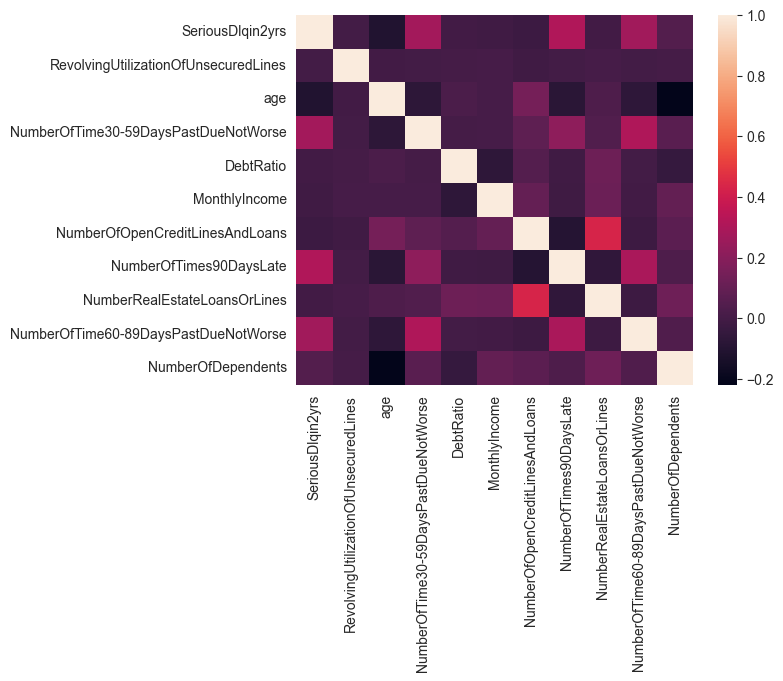

In [35]:
import seaborn as sns
import scorecardpy as sc
sns.heatmap(data.corr())

In [45]:
#剔除两两相关变量中iv较低者
def get_sc_iv(df_num,features,label='SeriousDlqin2yrs',bin_num_limit =10):
    """
    输入：
    df_num:特征矩阵
    features:特征名称
    label：标签名称
    bin_num_limit :分箱箱数限制
    method:方法
    输出：
    return woe_bins
    """
    exclude_cols = ['SeriousDlqin2yrs']
    iv_dict = {}
    i = 0
    for col in features:
        try:
            i += 1
            print(i,col)
            bins = sc.woebin(df_num[[col,label]],y = label,bin_num_limit=bin_num_limit)
            iv_dict[col] = bins
        except:
            print(col)
    #print(iv_dict)
    woe_bins = pd.DataFrame()
    for key in iv_dict:
         woe_bins = pd.concat([woe_bins, iv_dict[key][key]])
        #woe_bins = woe_bins.append(iv_dict[key][key],ignore_index=True)
    woe_bins = woe_bins[~woe_bins['variable'].isin(exclude_cols)].rename(columns = {'variable':'cols'})
    return iv_dict,woe_bins

In [46]:
iv,sc_iv = get_sc_iv(data,varnum[1:])

1 RevolvingUtilizationOfUnsecuredLines
[INFO] creating woe binning ...
{'RevolvingUtilizationOfUnsecuredLines':                                variable                         bin  count  \
0  RevolvingUtilizationOfUnsecuredLines  [-inf,0.15000000000000002)  74013   
1  RevolvingUtilizationOfUnsecuredLines   [0.15000000000000002,0.5)  34390   
2  RevolvingUtilizationOfUnsecuredLines    [0.5,0.8500000000000001)  18592   
3  RevolvingUtilizationOfUnsecuredLines    [0.8500000000000001,inf)  22170   

   count_distr   good   bad   badprob       woe    bin_iv  total_iv  \
0     0.496182  72591  1422  0.019213 -1.286008  0.484971  1.058589   
1     0.230550  32825  1565  0.045507 -0.396536  0.030590  1.058589   
2     0.124640  16487  2105  0.113221  0.588512  0.055817  1.058589   
3     0.148627  17389  4781  0.215652  1.355581  0.487211  1.058589   

                breaks  is_special_values  
0  0.15000000000000002              False  
1                  0.5              False  
2   0.850

In [48]:
sc_iv = pd.DataFrame(sc_iv.groupby('cols')['total_iv'].mean())

In [61]:
sc_iv.loc['age'][0]

0.24199927869207197

In [50]:
#相关性剔除
def forward_delete_corr(df,sc_iv,col_list,threshold = None):
    """
    df:训练数据集
    col_list:变量list集合
    threshold:相关性设定的阈值
    return：相关性剔除后的变量
    """
    list_corr = col_list[:]
    for col in list_corr:
        corr = df.loc[:,list_corr].corr()[col]
        corr_index = [x for x in corr.index if x!=col]
        corr_values = [x for x in corr.values if x!=1]
        for i,j in zip(corr_index,corr_values):
            if abs(j)>=threshold:
                if sc_iv.loc[col][0] < sc_iv.loc[i][0]:
                    list_corr.remove(col)
                    break
                else:
                    list_corr.remove(i)
    return list_corr

In [51]:
def corr_mapping(df,col_list,threshold=None):
    """
    df:数据集
    col_list:变量list集合
    threshold:相关性设定的阈值
    return:强相关性变量之间的映射关系表
    """
    corr_df = df.loc[:,col_list].corr()
    col_a = []
    col_b = []
    corr_value = []
    for col,i in zip(col_list[1:],range(1,len(col_list),1)):
        high_corr_col = []
        high_corr_value = []
        corr_series = corr_df[col][1:]
        for i,j in zip(corr_series.index,corr_series.values):
            if abs(j)>threshold:
                high_corr_col.append(i)
                high_corr_value.append(j)
        col_a.extend([col]*len(high_corr_col))
        col_b.extend(high_corr_col)
        corr_value.extend(high_corr_value)
    corr_map_df = pd.DataFrame({'col_A':col_a,
                                'col_B':col_b,
                                'corr':corr_value,
                               })
    return corr_map_df

In [52]:
var_num = forward_delete_corr(data,sc_iv,data.columns.tolist(),threshold=0.6)

## 3.3iv筛选

In [53]:
var_num = [x for x in var_num[1:] if sc_iv.loc[x][0] > 0.02 and sc_iv.loc[x][0] <1.2 ]

In [54]:
var_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [104]:
data = data[var_num+['SeriousDlqin2yrs']]

# 4 区分训练集和测试集

In [105]:
from sklearn.model_selection import train_test_split
x = data[var_num]
y = data['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [115]:
#训练数据
model_data = pd.concat([y_train,x_train],axis=1)
#model_data.reset_index(drop = True,inplace=True)
model_data.index = range(model_data.shape[0])


In [116]:
# 测试数据
vali_data = pd.concat([y_test,x_test],axis=1)
vali_data.index = range(vali_data.shape[0])


In [117]:
#保存数据
model_data.to_csv('./data/model_data.csv')
vali_data.to_csv('./data/vali_data.csv')

# 5分箱

## 5.1等频分箱

In [ ]:
# 分箱个数（通过iv值的曲线）：分箱效果：组间差异大，组内差异小
# 按照等频对需要分箱的列进行分箱
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)
"""
pd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维的数据，
q：分箱的个数
返回：箱子的上限和下限
"""
#所有箱子的下限
model_data

In [268]:
#统计每个分箱中0和1的数量
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby('qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby('qcut').count()['SeriousDlqin2yrs']
#num_bins值为每个区间的上界、下界、0出现的次数、1出现的次数
#*zip代表解压
numbins = [*zip(updown,updown[1:],count_y0,count_y1)]
numbins

[(21.0, 29.0, 5214, 702),
 (29.0, 33.0, 5091, 617),
 (33.0, 36.0, 4162, 469),
 (36.0, 39.0, 5174, 515),
 (39.0, 41.0, 3947, 381),
 (41.0, 44.0, 6135, 556),
 (44.0, 46.0, 4646, 410),
 (46.0, 48.0, 4884, 403),
 (48.0, 50.0, 4935, 422),
 (50.0, 52.0, 4623, 377),
 (52.0, 54.0, 4666, 344),
 (54.0, 56.0, 4647, 293),
 (56.0, 58.0, 4540, 240),
 (58.0, 61.0, 6672, 351),
 (61.0, 63.0, 4886, 193),
 (63.0, 65.0, 3834, 129),
 (65.0, 68.0, 4913, 144),
 (68.0, 72.0, 4769, 131),
 (72.0, 78.0, 5194, 119),
 (78.0, 109.0, 4595, 92)]

# 5.2确保每个箱中都有0和1

In [278]:
#确保每个箱中都有0和1
for i in range(len(numbins)):
    if 0 in numbins[i][2:]:
        numbins[i:i+2] = [(numbins[i][0],numbins[i+1][i+1],\
                       numbins[i][2]+numbins[i+1][2],\
                       numbins[i][3]+numbins[i+1][3])]

        break
    else:
        continue

# 5.3 定义woe和iv函数

In [282]:
# 计算woe 和 bad rate
# bad rate 与bad%不是一个东西
# bad rate = bad(i)/total
# bad%= bad(i)/bad(total)
def get_woe(num_bins):
    #通过num_bins 数据计算woe
    columns = ['bin_min','bin_max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns = columns)
    df['total'] = df.c